# Data Cleaning #

Data cleaning or data cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

## 1. Overview of the data set

First, let’s take a look at the data in Python.

In [1]:
import pandas as pd
df = pd.read_csv('sberbank.csv') # renamed from the csv file within train.csv.zip on Kaggle

df.info(verbose=True)  # when "=True", Prints information of all columns.

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,8/20/2011,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,8/23/2011,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,8/27/2011,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,9/1/2011,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,9/5/2011,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


We can also identify the numeric and non-numeric columns. These are necessary since we often treat them using different methods.

In [2]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
       'cafe_count_5000_price_high', 'big_church_count_5000',
       'church_count_5000', 'mosque_count_5000', 'leisure_count_5000',
       'sport_count_5000', 'market_count_5000', 'price_doc'],
      dtype='object', length=276)
Index(['timestamp', 'product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')


## 2. Missing data

Missing data or missing values are when there’s no data value stored for a column in a row. It is very common among real-world datasets. If not handled properly, they would significantly impact the results of data analysis. Many machine learning models can’t tolerate any missing values. So, we must learn how to handle missing data.

How to find out missing data:

### Method 1: missing data (by columns) count & percentage

In [3]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  30471 non-null  object
 1   product_type               30471 non-null  object
 2   sub_area                   30471 non-null  object
 3   culture_objects_top_25     30471 non-null  object
 4   thermal_power_plant_raion  30471 non-null  object
 5   incineration_raion         30471 non-null  object
 6   oil_chemistry_raion        30471 non-null  object
 7   radiation_raion            30471 non-null  object
 8   railroad_terminal_raion    30471 non-null  object
 9   big_market_raion           30471 non-null  object
 10  nuclear_reactor_raion      30471 non-null  object
 11  detention_facility_raion   30471 non-null  object
 12  water_1line                30471 non-null  object
 13  big_road1_1line            30471 non-null  object
 14  railro

In [7]:
df[numeric_cols].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 276 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    full_sq                                int64  
 2    life_sq                                float64
 3    floor                                  float64
 4    max_floor                              float64
 5    material                               float64
 6    build_year                             float64
 7    num_room                               float64
 8    kitch_sq                               float64
 9    state                                  float64
 10   area_m                                 float64
 11   raion_popul                            int64  
 12   green_zone_part                        float64
 13   indust_part                            float64
 14   children_preschool                  

By looking at the Non-Null Count, we can spot the number of missing data by columns. For our example, all non-null counts are 30,471, the same as the total number of rows, so there are no missing data among the non-numeric columns!

Besides the *info* method, there are also dedicated methods for missing values. For example, *isna().sum()* stores the columns and their numbers of missing values. We can print out the first 10 columns to look at.

In [4]:
num_missing = df.isna().sum()
num_missing[:10]

id                0
timestamp         0
full_sq           0
life_sq        6383
floor           167
max_floor      9572
material       9572
build_year    13605
num_room       9572
kitch_sq       9572
dtype: int64

*isna().mean()* calculate the percentages of missing values by columns. 

In [5]:
pct_missing = df.isna().mean()
pct_missing[:10]

id            0.000000
timestamp     0.000000
full_sq       0.000000
life_sq       0.209478
floor         0.005481
max_floor     0.314135
material      0.314135
build_year    0.446490
num_room      0.314135
kitch_sq      0.314135
dtype: float64

### Method 2: missing data (by columns) heatmap

We can build a heatmap to visualize the missing data. This technique is proper when you have a smaller number of columns.

Let’s use the first 30 columns of our dataset as an example. We’ll use 2 Python libraries to create the heatmap: *seaborn* and *missingno*.

**seaborn**

The seaborn library is a popular statistical data visualization library. Let’s first use it to plot the missing data heatmap.

<Axes: >

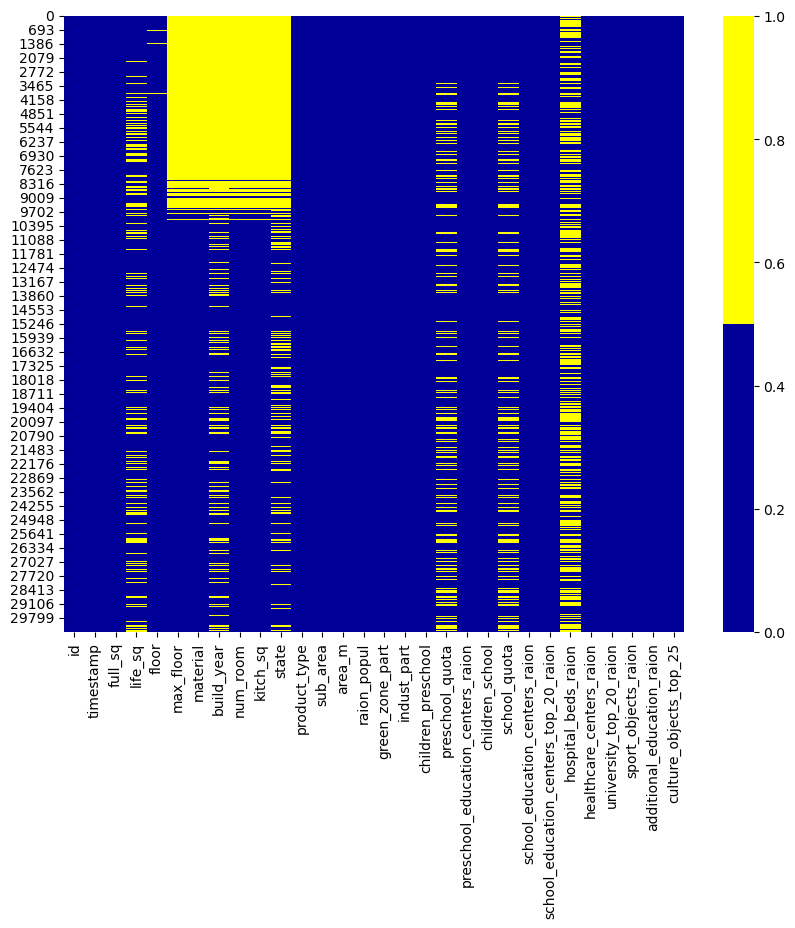

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

cols = df.columns[:30]
colours = ['#000099', '#ffff00'] # specify colours: yellow - missing. blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

**missingno**

The missingno library is a small toolset focused on missing data visualizations and utilities. Within the missingno library, there are four types of plots for visualising data completeness: the barplot, the matrix plot, the heatmap, and the dendrogram plot. Each has its own advantages for identifying missing data.

You may need the following link to install this library first:

*pip install missingno*

In [13]:
#pip install missingno
import missingno as msno

**Barplot**

The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:

<Axes: >

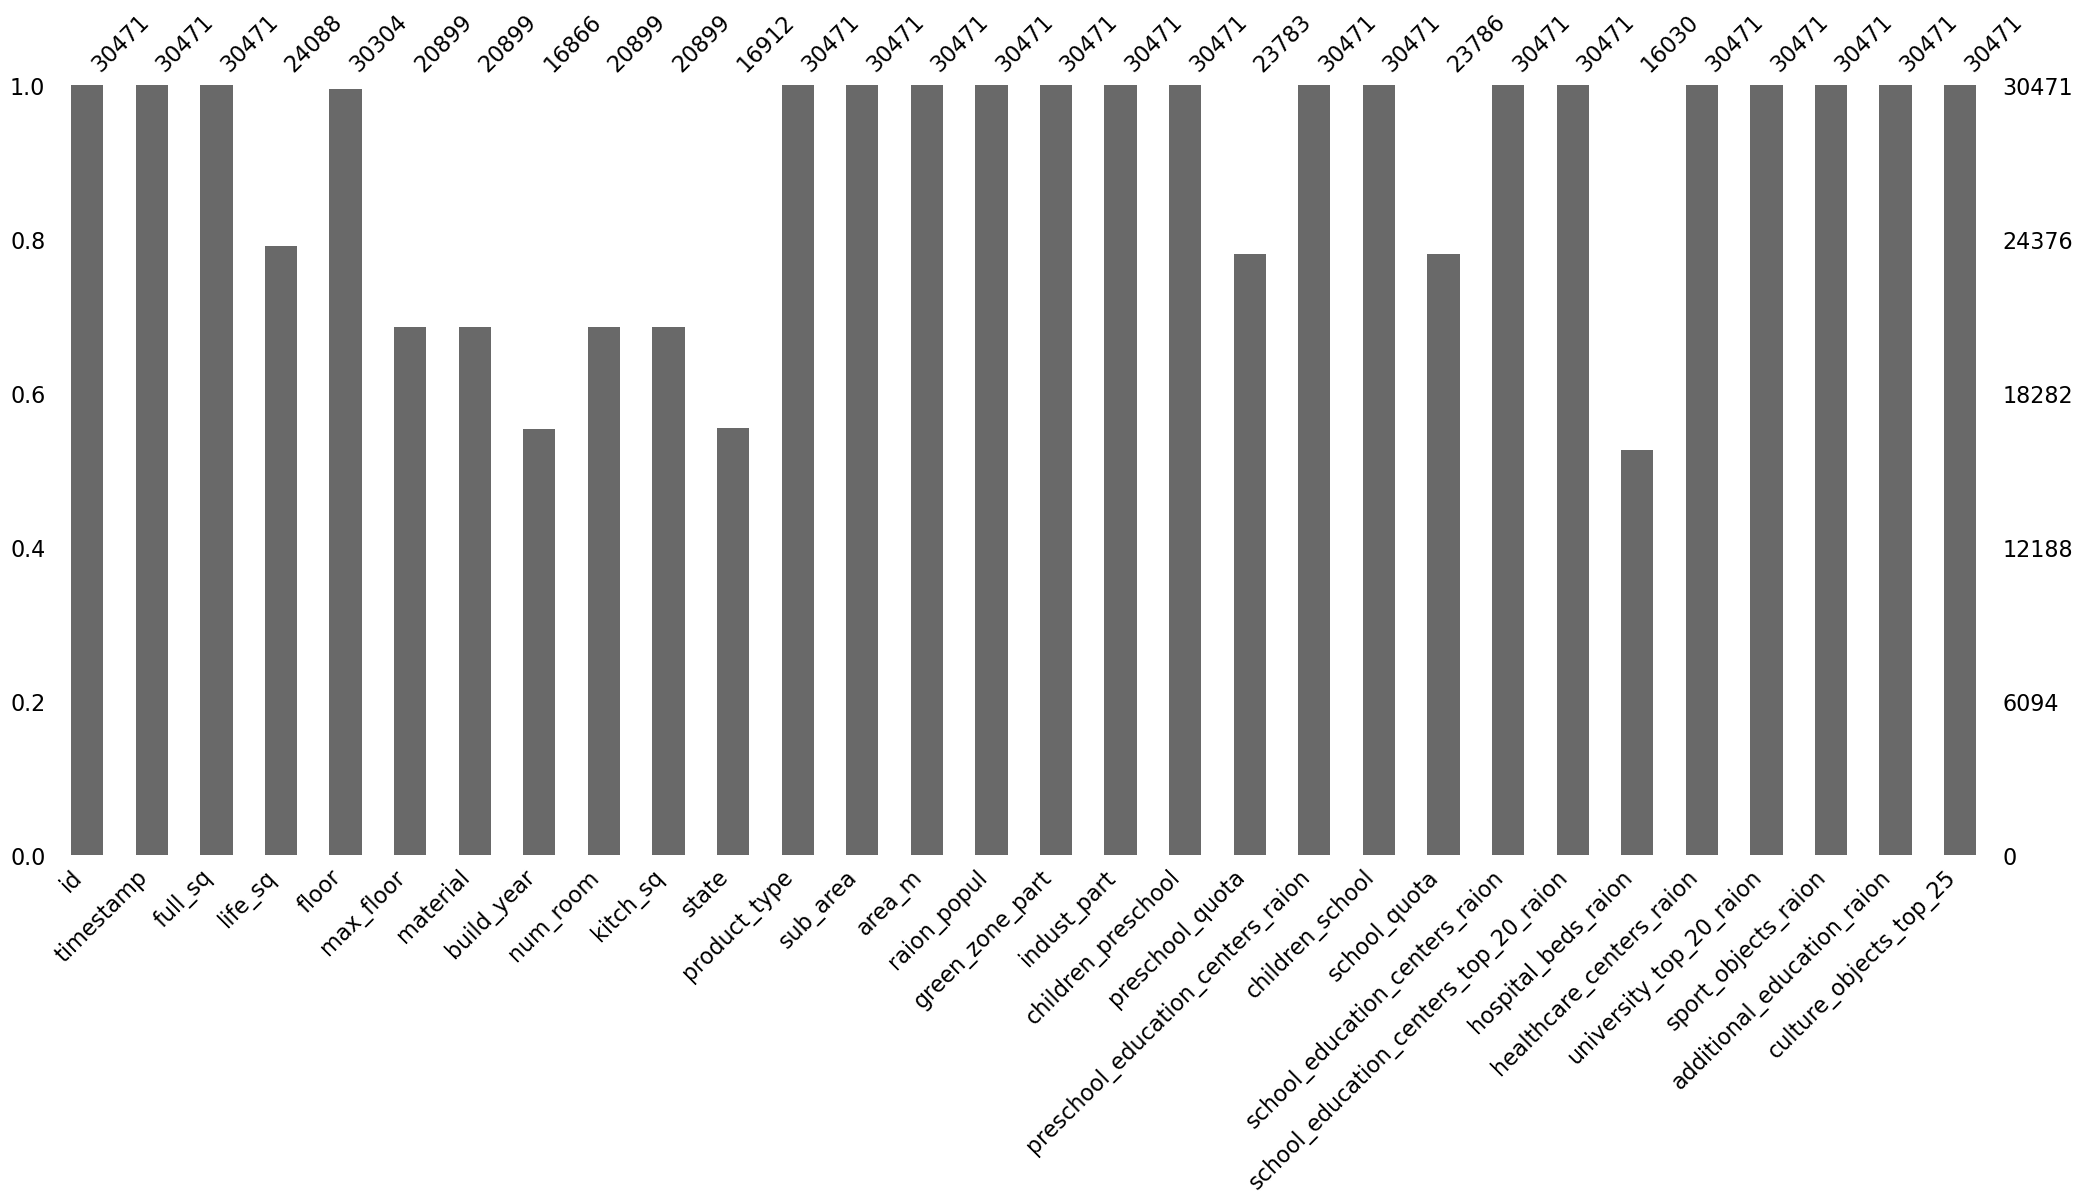

In [14]:
msno.bar(df.iloc[:, :30])

**Matrix Plot**

The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white. On the right side of the plot is a sparkline that ranges from 0 on the left to the total number of columns in the dataframe on the right.

<Axes: >

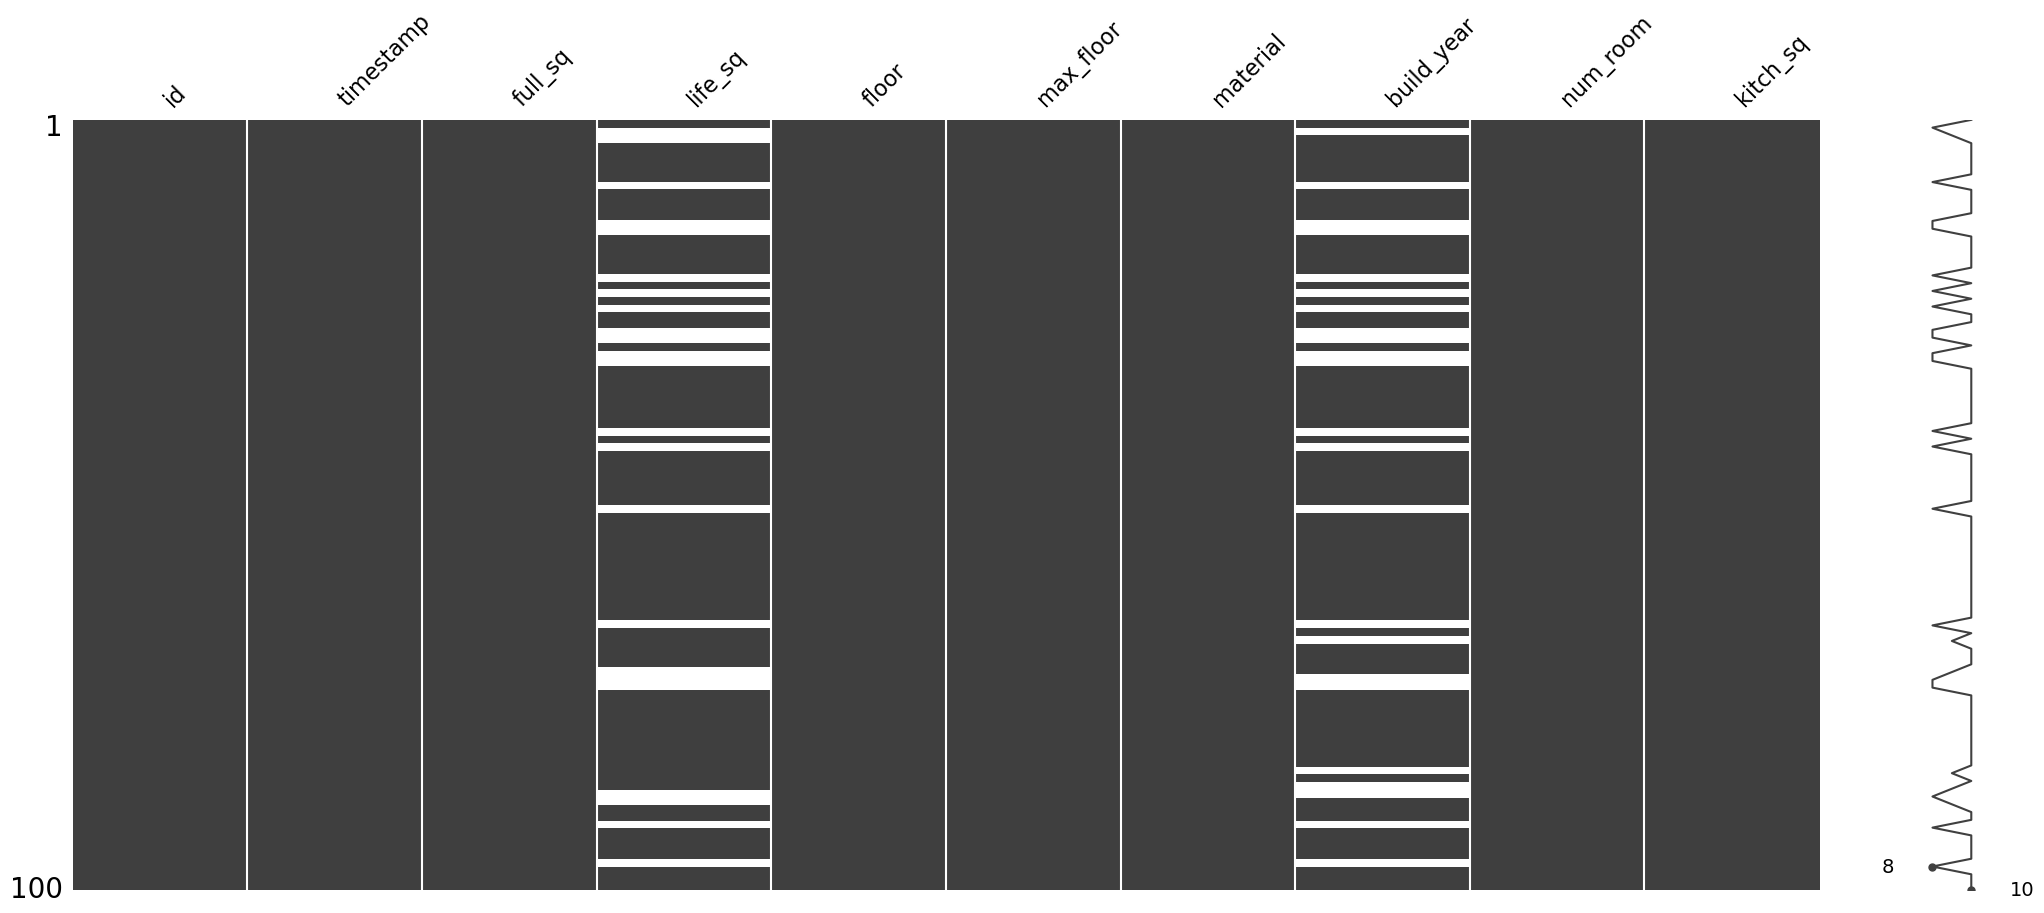

In [15]:
msno.matrix(df.iloc[29000:29100, :10])

**Heatmap**

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

- Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
- Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
- Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.
- There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

The heatmap can be generated by the following code:

<Axes: >

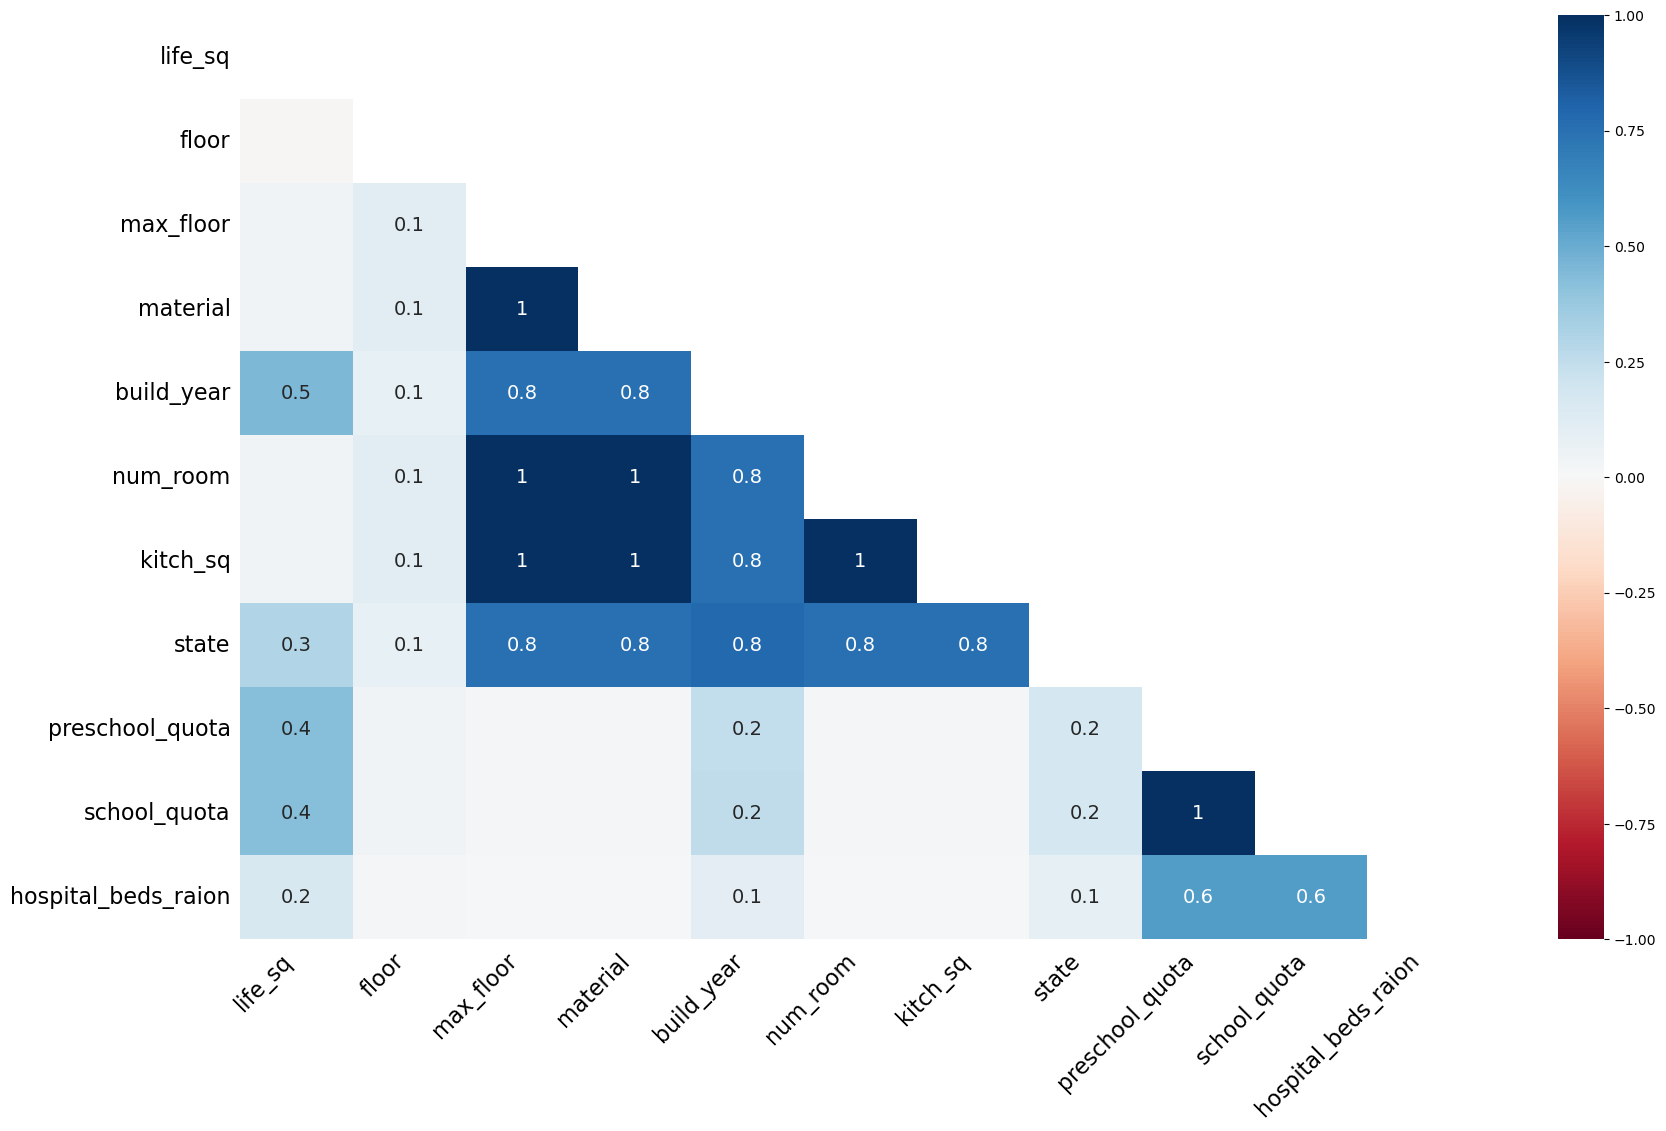

In [16]:
msno.heatmap(df.iloc[:, :30])

**Dendrogram**

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.
If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

<Axes: >

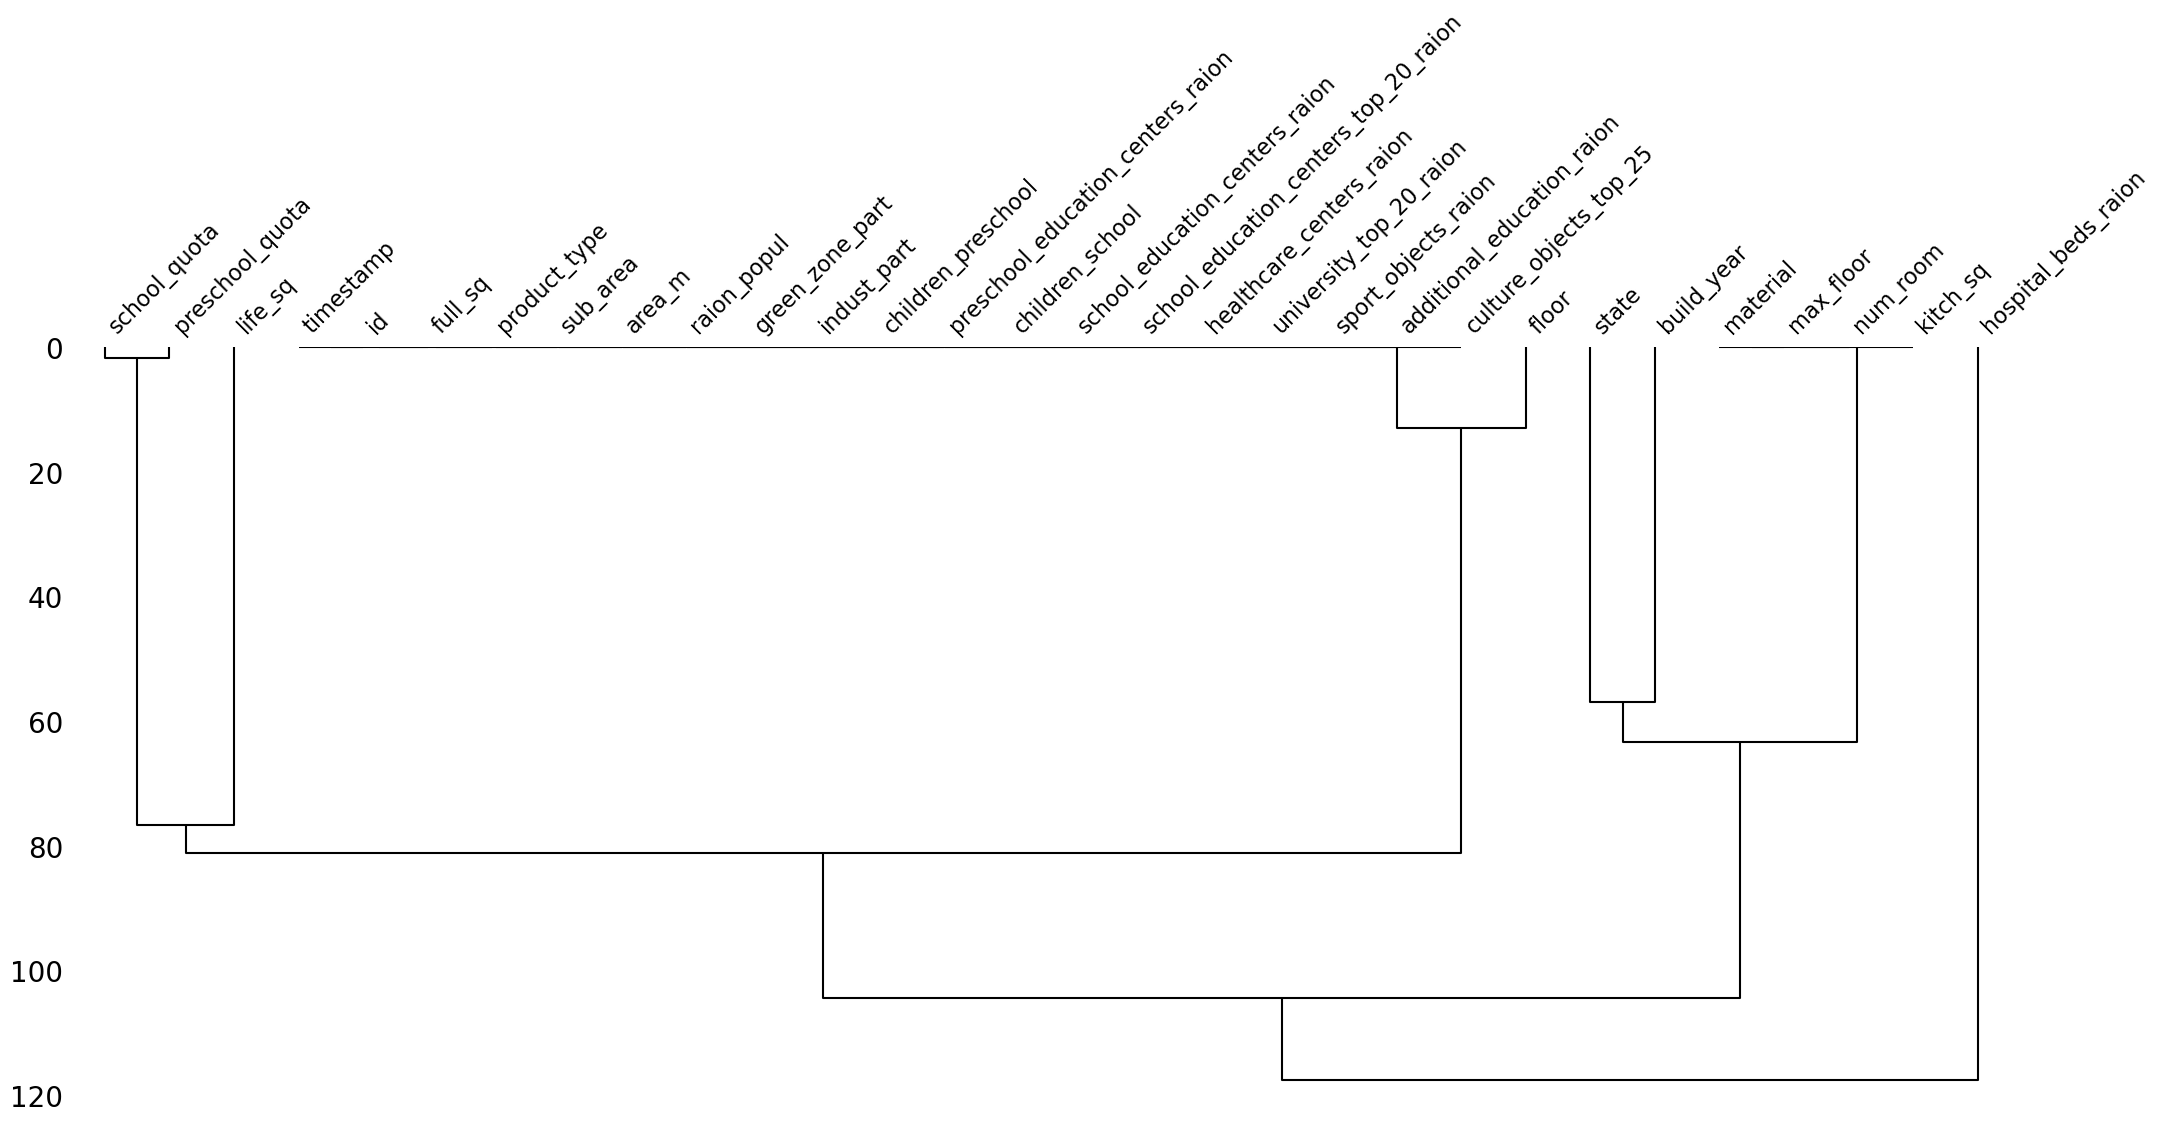

In [17]:
msno.dendrogram(df.iloc[:, :30])

### Method 3: missing data (by rows) histogram

We’ve been looking at missing data by columns. But we can also summarize the missing data by rows. Missing data histogram is a technique for summarizing such information.

<Axes: >

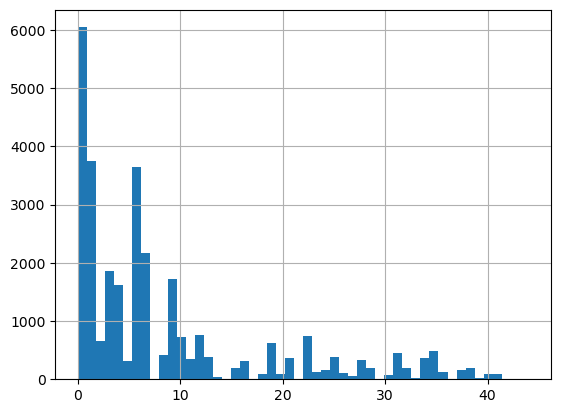

In [18]:
missing_by_row = df.isna().sum(axis='columns')
missing_by_row.hist(bins=50)

This histogram helps to identify the missing patterns among the 30,471 observations. For example, there are over 6,000 observations with no missing values, and close to 4,000 observations with 1 missing value.

## 3. Dealing with missing data

There are NO agreed-upon solutions to dealing with missing data. We have to study the dataset and its specific columns to determine how to clean their missing values.

Below covers the 4 most used methods of cleaning missing data in Python. If the situation is more complicated, you could be creative and use more sophisticated methods such as modeling.

### Technique 1: drop columns / features

This technique is straightforward. We drop the entire column or feature with missing data, which will certainly cause a loss of information. So we should only perform this when we are sure that the missing data is not informative. Otherwise, we should consider other solutions.

Since we have lots of columns with missing data (51 out of 292), let’s not drop all of them. Let’s consider the columns with a high percentage of missing.

In [19]:
pct_missing[pct_missing > .3]

max_floor                     0.314135
material                      0.314135
build_year                    0.446490
num_room                      0.314135
kitch_sq                      0.314135
state                         0.444980
hospital_beds_raion           0.473926
cafe_sum_500_min_price_avg    0.435857
cafe_sum_500_max_price_avg    0.435857
cafe_avg_price_500            0.435857
dtype: float64

In [20]:
df_less_missing_cols = df.loc[:, pct_missing <= .3].copy() # equivalent to df.drop(columns=pct_missing[pct_missing > .3].index)
df_less_missing_cols.shape

(30471, 282)

### Technique 2: drop rows / observations

We can drop the entire row with missing data like the first technique. Again, please be aware of the loss of information when removing rows.

If we only want to drop the rows with many missing values, we can do it similarly to the previous technique.

In [21]:
df_less_missing_rows = df[missing_by_row < 35].copy()
df_less_missing_rows.shape # equivalent to df.dropna(axis='index', thresh=292-35+1).shape

(29302, 292)

### Technique 3: impute the missing with constant values

Instead of dropping data, we can also replace the missing. An easy method is to impute the missing with constant values. For example, we can impute the numeric columns with a value of *-999* and impute the non-numeric columns with *_MISSING_*.

In [22]:
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(-999)
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('_MISSING_')

In [23]:
num_missing_copy = df_copy.isna().sum()
num_missing_copy[:10]

id            0
timestamp     0
full_sq       0
life_sq       0
floor         0
max_floor     0
material      0
build_year    0
num_room      0
kitch_sq      0
dtype: int64

### Technique #4: impute the missing with statistics
Besides constants, we can also impute the missing values with statistics. 

For example, we can impute the numeric columns with their respective medians. We can also impute the non-numeric columns with their most frequent values.

In [24]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

In [25]:
most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

timestamp                             12/16/2014
product_type                          Investment
sub_area                     Poselenie Sosenskoe
culture_objects_top_25                        no
thermal_power_plant_raion                     no
incineration_raion                            no
oil_chemistry_raion                           no
radiation_raion                               no
railroad_terminal_raion                       no
big_market_raion                              no
nuclear_reactor_raion                         no
detention_facility_raion                      no
water_1line                                   no
big_road1_1line                               no
railroad_1line                                no
ecology                                     poor
Name: top, dtype: object

In [26]:
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

In [27]:
num_missing_copy = df_copy.isna().sum()
num_missing_copy[:10]

id            0
timestamp     0
full_sq       0
life_sq       0
floor         0
max_floor     0
material      0
build_year    0
num_room      0
kitch_sq      0
dtype: int64